# Regression on Captial Bike Sharing system Dataset (Washington, D.C.)

This is the code for problem P2.
In this problem, the objective is to predict the daily level of bicycle rentals from environmental and seasonal variables using decision trees.For this, the DecisionTreeClassifier model of the Scikit Learn python library is employed.The built decision tree using the training data is visualized using the graphviz library.

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
from sklearn.tree import DecisionTreeRegressor,export_graphviz
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In the following snippet, the training data is loaded from "bikes.csv" present in "P2_data/P2_data/" directory into numpy array and train features and train labels are separated.

In [2]:
data = pd.read_csv("P2_data/P2_data/bikes.csv")
date = np.array(data["date"])
season = np.array(data["season"])
year = np.array(data["year"])
month = np.array(data["month"])
holiday = np.array(data["holiday"])
weekday = np.array(data["weekday"])
workingday = np.array(data["workingday"])
weather = np.array(data["weather"])
temp = np.array(data["temp"])
humidity = np.array(data["humidity"])
windspeed = np.array(data["windspeed"])

total_data=np.array(data)
#train_data=train_data[:,0:11]
train_data=total_data[:,1:11]
train_values = np.array(data["count"])
train_size=train_data.shape

Here, a DecisionTreeRegressor model is defined.The default 'criterion' parameter is set to 'mse' which uses mean square error as the splitting criterion.Then, the regressor model is trained using the training data using its method 'fit' to build the tree.

In [3]:
clf = DecisionTreeRegressor(random_state=10)
clf = clf.fit(train_data, train_values)

Using graphiz library, the learned regression tree is visualized.The corresponding features used for building the tree are marked.

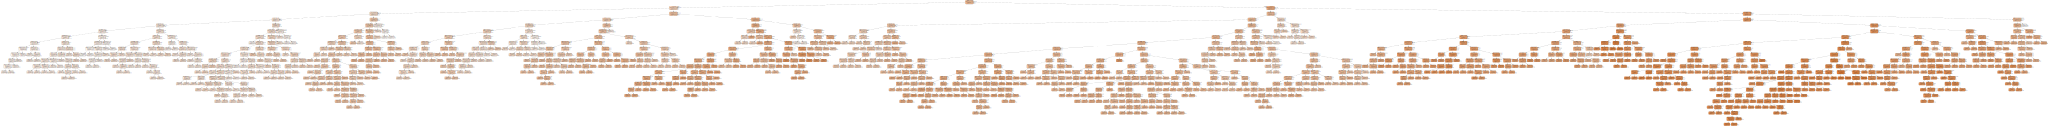

In [4]:
#feature_names=['date','season','year','month','holiday','weekday','workingday','weather','temp','humidity','windspeed']
feature_names=['season','year','month','holiday','weekday','workingday','weather','temp','humidity','windspeed']
dot_data = export_graphviz(clf, out_file=None,feature_names=feature_names,filled=True,rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

The code snippet below computes the number of total nodes and leaves present in the regression tree and in how many different groups of days the tree is divided .It also mentions which features are used to construct the regression tree and what are their corresponding importance percentages.The mean square error incurred in the training data is also computed using Scikit Learn's 'metric' library.

In [5]:
print("Number of leaf nodes:",end="")
Out=clf.apply(train_data)
print(len(set(Out)))
print("Important features/Importance Percentage(%):")
feature_imp=clf.feature_importances_
for i in range(train_size[1]):
    if feature_imp[i]>0:
        print(feature_names[i],":",feature_imp[i]*100)

Number of leaf nodes:731
Important features/Importance Percentage(%):
season : 7.55690268545
year : 29.2129864657
month : 3.76783518278
holiday : 0.389334935403
weekday : 2.07031357531
workingday : 0.333274552458
weather : 2.2167724043
temp : 43.8869842923
humidity : 7.07866746551
windspeed : 3.48692844073


In [6]:
predicted_values=clf.predict(train_data)
mse=mean_squared_error(train_values, predicted_values)
print("MSE:",end="")
print(mse)

MSE:0.0


It is seen that the features having significant percentages of importances are **temperature** and **year**.<br><br>
Now we restrict the maximum depth of the tree to reduce overfitting of the data.First, the maximum depth of original tree is calculated.The entire data is split into train and test data by a suitable fraction.Then for various depth restrictions, a new regression tree is built and labels of the test data are predicted using the tree and the mean square error is calculated for each such cases.We take that depth that has the minimum MSE.

In [7]:
###Experimentation
total_nodes = clf.tree_.node_count
left_child = clf.tree_.children_left
right_child = clf.tree_.children_right
feature = clf.tree_.feature

node_depth = np.zeros(shape=total_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=total_nodes, dtype=bool)
stack = [(0, -1)]
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (left_child[node_id] != right_child[node_id]):
        stack.append((left_child[node_id], parent_depth + 1))
        stack.append((right_child[node_id], parent_depth + 1))
max_depth=max(node_depth)
print("Maximum Depth:",end="")
print(max_depth)
np.random.shuffle(total_data)
X_train, X_test, y_train, y_test = train_test_split(total_data[:,1:11], total_data[:,11], test_size=0.30, random_state=10)

Maximum Depth:21


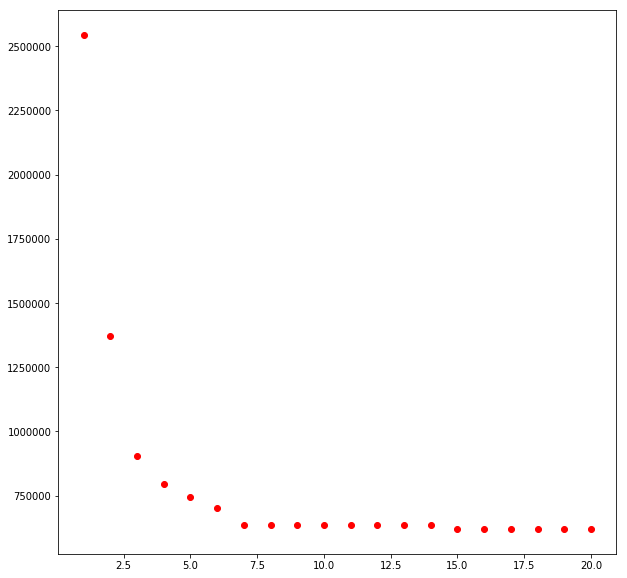

Minimum MSE:619955.586667
Depth having minimum MSE: 15
Number of groups of days the tree data is divided:469


In [8]:
mse_min=math.inf
depth_min=-1
plt.figure(figsize=(10,10))
for i in range(max_depth):
    clf_new = DecisionTreeRegressor(max_depth=i+1,random_state=10)
    clf_new.fit(X_train,y_train)
    predicted_test=clf_new.predict(X_test)
    mse_new=mean_squared_error(y_test, predicted_test)
    plt.plot(i,mse_min,'ro')
    if(mse_new<mse_min):
        mse_min=mse_new
        depth_min = i+1
plt.show()
print("Minimum MSE:",end="")
print(mse_min)
print("Depth having minimum MSE:",depth_min)
clf_new = DecisionTreeRegressor(max_depth=depth_min,random_state=10)
clf_new.fit(X_train,y_train)
predicted_test=clf_new.predict(X_test)
mse_new=mean_squared_error(y_test, predicted_test)
print("Number of groups of days the tree data is divided:",end="")
out=clf_new.apply(X_train)
print(len(set(out)))

Thus it is seen that for lesser depth of the tree,it does not overfit the data.Also,the data are divided into a number of groups which is less than the total number of training examples.<br><br>
Next, the feature month in training data is modified in such a way that January and February share one code, May through October
shares another, and March, April, November and December share a third.After this modification the regression tree is retrained and visualize using graphviz.

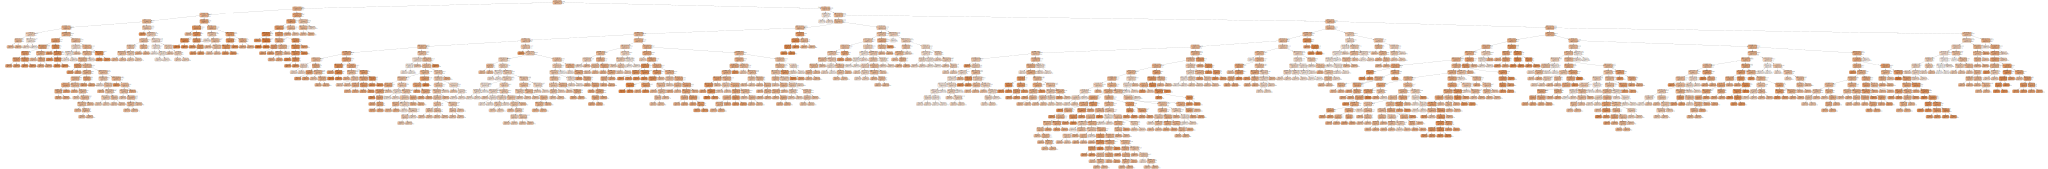

In [9]:
####Part 2
train_data2=train_data
        
for i in range(train_size[0]):
    if train_data2[i][2] == 1 or train_data2[i][2] == 2:
        train_data2[i][2]=1
    elif train_data2[i][2]>=5 and train_data2[i][2] <=10:
        train_data2[i][2] == 2
    else:
        train_data2[i][2] == 3        
clf_new = DecisionTreeRegressor(random_state=10)
clf_new = clf_new.fit(train_data2, train_values) 
#feature_names=['date','season','year','month','holiday','weekday','workingday','weather','temp','humidity','windspeed']
feature_names=['season','year','month','holiday','weekday','workingday','weather','temp','humidity','windspeed']
dot_data = export_graphviz(clf_new, out_file=None,feature_names=feature_names,filled=True,rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Here, the number of total nodes and leaves present in the regression tree is recomputed using new estimated regression tree.It also mentions which features are used to construct the tree and what are their corresponding importance percentages.The mean square error incurred in the training data is also computed.

In [10]:
print("Number of leaf nodes:",end="")
Out2=clf_new.apply(train_data)
print(len(set(Out2)))
print("Important features/Importance Percentage(%):")
feature_imp_new=clf_new.feature_importances_
for i in range(train_size[1]):
    if feature_imp_new[i]>0:
        print(feature_names[i],":",feature_imp_new[i]*100)

Number of leaf nodes:731
Important features/Importance Percentage(%):
season : 3.04305225755
year : 3.40661347039
month : 6.50569585969
holiday : 0.553244813766
weekday : 10.9066756701
workingday : 1.54145985867
weather : 1.58124424031
temp : 24.5611114311
humidity : 24.2358823101
windspeed : 23.6650200884


In [11]:
predicted_values_new=clf_new.predict(train_data)
mse=mean_squared_error(train_values, predicted_values_new)
print("MSE:",end="")
print(mse)

MSE:0.0


Restricting the depth equal to that obtained in the previous case for the original data,we build a new tree based on the modified data.We compare this new tree with the one formed using unmodified data having the same depth restriction i.e. the depth having the minimum mean square error.We compare the performance of the two trees with the same depth restriction by calculating the mean square error.

In [12]:
X_train_size=X_train.shape
X_test_size=X_test.shape
for i in range(X_train_size[0]):
    if X_train[i][2] == 1 or X_train[i][2] == 2:
        X_train[i][2]=1
    elif X_train[i][2]>=5 and X_train[i][2] <=10:
        X_train[i][2] == 2
    else:
        X_train[i][2] == 3
for i in range(X_test_size[0]):
    if X_test[i][2] == 1 or X_test[i][2] == 2:
        X_test[i][2]=1
    elif X_test[i][2]>=5 and X_test[i][2] <=10:
        X_test[i][2] == 2
    else:
        X_test[i][2] == 3        
clf_new = DecisionTreeRegressor(max_depth=depth_min,random_state=10)
clf_new.fit(X_train,y_train)
predicted_test=clf_new.predict(X_test)
mse_new=mean_squared_error(y_test, predicted_test)
print("MSE:",end="")
print(mse_new)
print("Leaf Nodes:",end="")
out=clf_new.apply(X_train)
print(len(set(out)))

MSE:669215.2599
Leaf Nodes:471


In general, it is observed that the mean square error increases when the month feature is recoded.Hence it did not improve the fit much.